In [6]:
#Import Geoff's Preprocessor
from x_ray import preprocessor 
import pandas as pd

In [7]:
##Create an instance of the class from Geoff's Preprocessor 
##and develop testing & response datasets split into testing and training subsets.  

#Use the function (provide a path, select input labels, and call the function)
csv_path = 'C:/Users/stany/Desktop/project-data-repo/x_ray_1000.csv'  #C:\Users\stany\Desktop
image_path = 'C:/Users/stany/Desktop/project-data-repo/x_ray_1000_images'
input_labels = ['Atelectasis','Cardiomegaly','Consolidation','Effusion','Infiltration','Mass',
               'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumothorax']
# input_labels = ['Cardiomegaly', 'No Finding']

# #Create an instance of the class 
prepper = preprocessor(csv_path, image_path, 100, 100, input_labels)

X_train, X_val, X_test, y_train, y_val, y_test = prepper.prepare_x_ray_data()

Assigning numerical Finding Labels to Finding IDs...
Creating a data frame of the flat image matrics & associated labels and then shuffling...


C:\Users\stany\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [9]:
#Create a Gaussian Classifier 
classifier=RandomForestClassifier(n_estimators=2500, random_state=123, oob_score=True) #Note, n_estimators is the number of trees

In [10]:
#Train the model using the training set, X_train, y_train 
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=1,
            oob_score=True, random_state=123, verbose=0, warm_start=False)

In [11]:
#Save the predictions 
y_pred = classifier.predict(X_test)

In [12]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [13]:
#Print Model Accuracy, how often is the classifier correct? 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2275


In [14]:
#Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5,1,'Confusion Matrix')

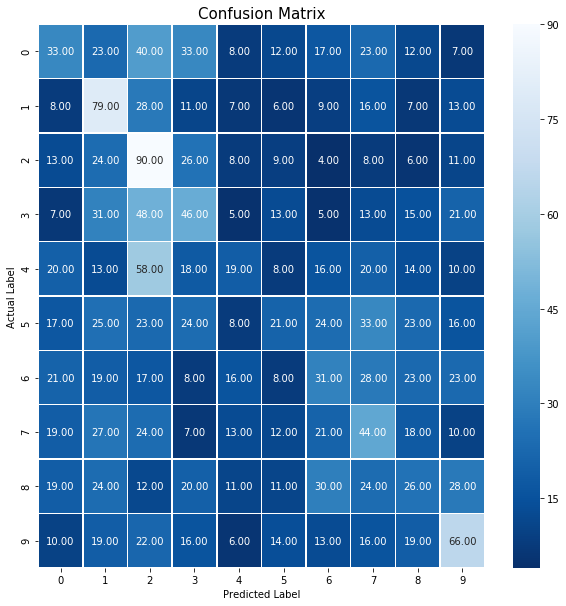

In [15]:
#Create Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square = False, cmap = 'Blues_r', xticklabels=True,yticklabels=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix', size = 15)

In [16]:
#Other classification metrics
print("Error Score:",1-metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred, average = "micro"))
print("Recall:",metrics.recall_score(y_test,y_pred, average = "micro"))
print("F1 Score:",metrics.f1_score(y_test,y_pred, average = "micro"))

Error Score: 0.7725
Precision: 0.2275
Recall: 0.2275
F1 Score: 0.2275


In [17]:
# fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
# plt.plot(fpr,tpr)
# plt.title("ROC")
# plt.xlabel("FPR")
# plt.ylabel("TPR")
# plt.show()

# print("AUC: ",metrics.roc_auc_score(y_test,y_pred))